# Spotify Music Analysis

#### Done by: Zhang Jieyuan

<u>Dataset</u>: music.csv

Description of columns:
- Highest Charting Position: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Week of Highest Charting: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song Name: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song iD: The song ID provided by Spotify (unique to each song).
- Streams: Approximate number of streams the song has.
- Artist: The main artist/ artists involved in making the song.
- Artist Followers: The number of followers the main artist has on Spotify.
- Genre: The genres the song belongs to.
- Release Date: The initial date that the song was released.
- Weeks Charted: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Popularity:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Chord: The main chord of the song instrumental.

## 1.0 Top 10 Artists

Identifed top 10 artists by the number of followers and found the total number of streams for each of the 10 artists selected.

Additionally those artists whose total number of streams is also among the top 10 are also highlighted

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv('music.csv')
df_bkp = df.copy(deep=True)

In [3]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [4]:
df.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [5]:
#Convert Streams to integer
df['Streams']=df['Streams'].apply(lambda x:''.join(x.split(',')) )
df['Streams']=df['Streams'].astype('int64')

In [6]:
df.info

<bound method DataFrame.info of       Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1    

In [7]:
df['Artist'].value_counts()

Taylor Swift                     52
Justin Bieber                    32
Lil Uzi Vert                     32
Juice WRLD                       30
BTS                              29
                                 ..
Cali Y El Dandee, Danna Paola     1
Harry Nach                        1
Mora, Jhay Cortez                 1
Blind Channel                     1
Kygo, Kim Petras                  1
Name: Artist, Length: 716, dtype: int64

In [8]:
p=re.compile(r'\w*\s*\w+,\s\w+')

In [9]:
df['MultipleArtist']=df['Artist'].apply(lambda s:p.match(s))
df2=df[df['MultipleArtist'].isnull()] #Remove songs with multiple singers for simplicity
df2.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,MultipleArtist
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",...,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,None
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,None
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,None
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",...,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,None
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,None


In [10]:
#Remove rows with no followers and no Streams

df2=df2[df2['Artist Followers'].apply(lambda x: x.isnumeric())]

In [11]:
df2['Artist Followers']=df2['Artist Followers'].astype('int64')
df2['Streams']=df2['Streams'].astype('int64')
df2['Popularity']=df2['Popularity'].astype('int64')
df2['Duration (ms)']=df2['Duration (ms)'].astype('int64')
df2['Release Date']=df2['Release Date'].astype('datetime64')

variables_float=['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence']
for i in variables_float:
    df2[i]=df2[i].astype('float64')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1555
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Index                      1213 non-null   int64         
 1   Highest Charting Position  1213 non-null   int64         
 2   Number of Times Charted    1213 non-null   int64         
 3   Week of Highest Charting   1213 non-null   object        
 4   Song Name                  1213 non-null   object        
 5   Streams                    1213 non-null   int64         
 6   Artist                     1213 non-null   object        
 7   Artist Followers           1213 non-null   int64         
 8   Song ID                    1213 non-null   object        
 9   Genre                      1156 non-null   object        
 10  Release Date               1213 non-null   datetime64[ns]
 11  Weeks Charted              1213 non-null   object        
 12  Popula

In [13]:
df2['Release Date'][0]

Timestamp('2017-12-08 00:00:00')

In [14]:
 #sum up the total no of streams of all songs even if there is not release date. Hence, df is used
streams_by_artist=df.groupby(by='Artist')['Streams'].sum()

latest_date_byartist = df2.groupby(by='Artist')['Release Date'].max()#find the latest release date

followers_by_artist_bydate=df2.groupby(by=['Artist','Release Date'])['Artist Followers'].mean()#find average no of follower for diff release date

#find the no of followers on latest release date
followers_by_artist=pd.merge(latest_date_byartist,followers_by_artist_bydate,how='left',left_on=['Artist','Release Date'], right_on=['Artist','Release Date'])
followers_by_artist

df_grp=pd.merge(followers_by_artist,streams_by_artist,how='left',left_on='Artist',right_on='Artist')
df_grp.reset_index(inplace=True)

In [15]:
followers_by_artist[followers_by_artist.index=='Ed Sheeran']

,Release Date,Artist Followers
Artist,,
Ed Sheeran,2021-08-13,1250353.0


In [16]:
streams_by_artist['Ariana Grande']

133298543

In [17]:
df_grp=df_grp.sort_values('Streams',ascending=False).reset_index(drop=True)
df_grp['Streams_rank']=df_grp.index
df_grp=df_grp.sort_values('Artist Followers',ascending=False).reset_index(drop=True)
df_grp
df_grp_top10=df_grp.iloc[:10]
df_grp_top10

,Artist,Release Date,Artist Followers,Streams,Streams_rank
0,Ariana Grande,2021-02-19,6.720817e+07,133298543,12
1,Drake,2021-03-05,5.631446e+07,128538281,13
2,Eminem,2021-05-28,4.678556e+07,162935796,8
3,Taylor Swift,2021-04-09,4.222761e+07,381480455,0
4,BTS,2021-07-09,3.710618e+07,238400020,1
5,Trio Vegabajeño,2020-11-27,3.617771e+07,5842320,235
6,Bad Bunny,2021-07-06,3.614227e+07,203813133,4
7,Queen,1980-06-27,3.588876e+07,26102099,57
8,The Weeknd,2021-04-23,3.530564e+07,149088439,9
9,Imagine Dragons,2021-07-02,3.528542e+07,21416659,72


<Figure size 432x288 with 0 Axes>

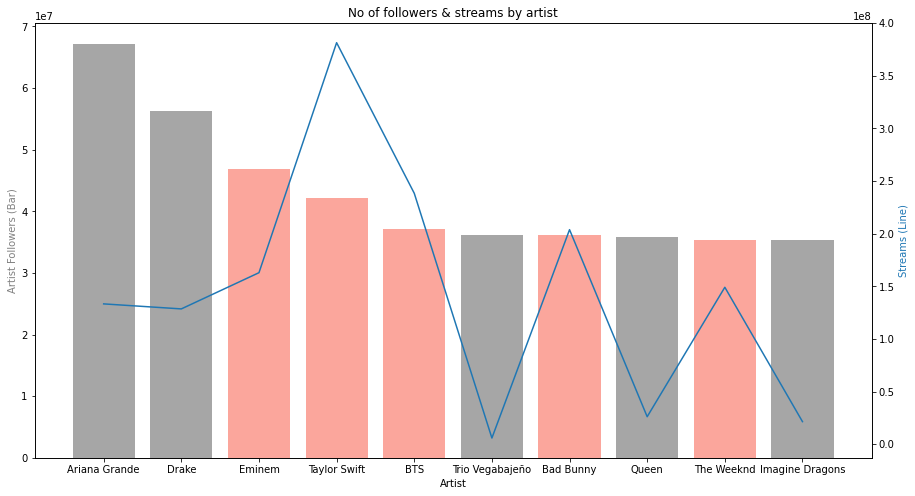

In [34]:
x=df_grp_top10['Artist']
y1=df_grp_top10['Artist Followers']
y2=df_grp_top10['Streams']
fig=plt.figure()

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()

ax2.plot(x,y2,color='tab:blue')

barcolor=[]
for i in df_grp_top10['Streams_rank']:
    if i<10:
        barcolor.append('salmon')
    else:
        barcolor.append('grey')
        
ax1.bar(x,y1,color=barcolor,alpha=0.7)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Artist Followers (Bar)', color='grey')
ax2.set_ylabel('Streams (Line)', color='tab:blue')

ax1.set(title='No of followers & streams by artist')

plt.show()

Out of the top 10 artists by followers, 5 of them are also top 10 artists by number of streams.

## 2.0 Artists in both top 10 no of followers and no of streams

Visualize how popularities, speechiness and valence of their songs varies with respect to the release dates of their streams.

In [19]:
Top10_Artists=df_grp_top10[df_grp_top10['Streams_rank']<10]['Artist']
Top10_Artists.tolist()
df_Top10_Artists=df2[df2['Artist'].isin(Top10_Artists)].reset_index(drop=True)
df_Top10_Artists.drop(columns='Index',inplace=True)
df_Top10_Artists

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,MultipleArtist
0,3,8,2021-06-18--2021-06-25,Yonaguni,25030128,Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"latin, reggaeton, trap latino",2021-06-04,...,0.648,-4.601,0.1180,0.27600,0.1350,179.951,206710,0.440,C#/Db,None
1,5,3,2021-07-09--2021-07-16,Permission to Dance,22062812,BTS,37106176,0LThjFY2iTtNdd4wviwVV2,"k-pop, k-pop boy group",2021-07-09,...,0.741,-5.330,0.0427,0.00544,0.3370,124.925,187585,0.646,A,None
2,2,10,2021-05-21--2021-05-28,Butter,19985713,BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"k-pop, k-pop boy group",2021-06-04,...,0.459,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab,None
3,5,14,2021-04-23--2021-04-30,Save Your Tears (with Ariana Grande) (Remix),18053141,The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"canadian contemporary r&b, canadian pop, pop",2021-04-23,...,0.825,-4.645,0.0325,0.02150,0.0936,118.091,191014,0.593,C,None
4,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809,The Weeknd,35305637,0VjIjW4GlUZAMYd2vXMi3b,"canadian contemporary r&b, canadian pop, pop",2020-03-20,...,0.730,-5.934,0.0598,0.00146,0.0897,171.005,200040,0.334,C#/Db,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,94,1,2020-01-17--2020-01-24,Farewell,8277608,Eminem,46814751,74gykWHknHDrg4eMdcmdRq,"detroit hip hop, hip hop, rap",2020-01-17,...,0.664,-6.625,0.1060,0.00487,0.2570,93.007,247733,0.467,E,None
148,100,1,2020-01-17--2020-01-24,Alfred - Interlude,8030151,Eminem,46814751,4EmunTy7kNBYQivOa8F6b8,"detroit hip hop, hip hop, rap",2020-01-17,...,0.231,-20.430,0.4020,0.87800,0.2790,74.545,30133,0.914,F,None
149,102,1,2020-01-17--2020-01-24,Little Engine,7913461,Eminem,46814751,4qNWEOMyexn7b8Icyk29t9,"detroit hip hop, hip hop, rap",2020-01-17,...,0.811,-4.162,0.2280,0.02340,0.0451,155.081,177293,0.760,A#/Bb,None
150,113,1,2020-01-17--2020-01-24,"I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",7115414,Eminem,46814751,3CJbxqRQ0JNCqboWDNUUeX,"detroit hip hop, hip hop, rap",2020-01-17,...,0.543,-5.941,0.0670,0.04540,0.2720,98.743,303000,0.036,G#/Ab,None


In [20]:
df_Top10_Artists_grp=df_Top10_Artists.groupby(by=['Release Date']).mean().reset_index()
df_Top10_Artists_grp

,Release Date,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,2000-05-23,172.000000,12.000000,4.948965e+06,4.678556e+07,84.000000,0.949000,0.661000,-4.244000,0.057200,0.030200,0.045400,104.504000,284200.000000,0.760000
1,2005-12-06,129.000000,3.000000,5.118004e+06,4.681475e+07,75.000000,0.692000,0.744000,-4.565000,0.257000,0.008680,0.359000,171.374000,326467.000000,0.061200
2,2015-08-28,125.333333,8.333333,5.159306e+06,3.532859e+07,77.666667,0.649667,0.541333,-6.954667,0.042933,0.195033,0.105700,113.593667,244484.333333,0.375333
3,2018-03-30,168.000000,3.000000,5.233359e+06,3.534007e+07,80.000000,0.461000,0.593000,-4.954000,0.035600,0.170000,0.307000,134.170000,228373.000000,0.175000
4,2019-04-12,85.000000,16.000000,5.266625e+06,3.710618e+07,82.000000,0.645000,0.862000,-4.757000,0.096500,0.092300,0.192000,119.991000,229773.000000,0.798000
5,2019-08-23,166.500000,5.000000,5.000031e+06,4.222761e+07,77.500000,0.690500,0.750500,-4.861000,0.056200,0.021145,0.090850,133.594000,182180.000000,0.721000
6,2019-11-13,199.000000,1.000000,4.595450e+06,4.222761e+07,70.000000,0.448000,0.603000,-7.176000,0.064000,0.433000,0.086200,205.272000,221307.000000,0.422000
7,2019-11-21,15.000000,25.000000,4.486408e+06,3.617771e+07,78.000000,0.886000,0.672000,-4.394000,0.188000,0.036300,0.101000,91.976000,192024.000000,0.526000
8,2019-12-06,181.000000,1.000000,6.657404e+06,4.222761e+07,52.000000,0.598000,0.680000,-4.505000,0.033100,0.060000,0.324000,134.002000,228027.000000,0.437000
9,2020-01-17,63.222222,5.222222,7.713830e+06,4.681313e+07,63.500000,0.734167,0.701833,-5.937111,0.226094,0.101308,0.315478,125.636000,212181.444444,0.442733


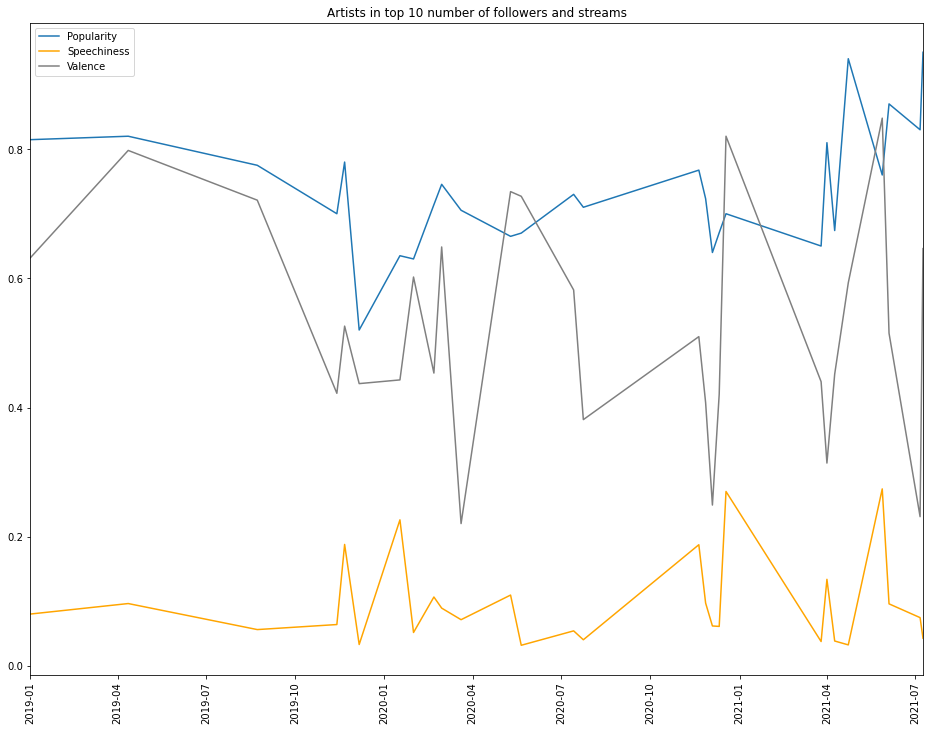

In [21]:

fig, ax = plt.subplots(figsize=(16, 12))

x=df_Top10_Artists_grp['Release Date']
y1=df_Top10_Artists_grp['Popularity']/100 # Popularity is converted from % to decimal
y2=df_Top10_Artists_grp['Speechiness']
y3=df_Top10_Artists_grp['Valence']

ax.plot(x,y1,label='Popularity')
ax.plot(x,y2,color='orange',label='Speechiness')
ax.plot(x,y3,color='grey',label='Valence')

ax.set_xlim([dt.datetime(2019,1,1),df_Top10_Artists_grp['Release Date'].max()])
plt.xticks(rotation=90)
plt.title('Artists in top 10 number of followers and streams')
plt.legend()
plt.show()
# As there are very few data points before 2019. 
# Hence, I have reset the x axis to data after 1 Jan 2019 to have clear view of how Popularity, Speechiness and Valence changes across time. 
#From the chart, Popularity seems to be positively associated with the combined effect of Speechiness and Valence.

## 3.0 Popular genres in 2020 by weeks

1. Selected songs that are released in year 2020.<br>
2. Counted the number of songs for each distinct genre, and selected the 10 most popular genres in the descending order of the number of associated songs.<br>
3. Visualized the trend of these popular genres on a weekly basis.<br>

In [22]:
df3=df[df['Genre'].notnull()].reset_index(drop=True)
df3=df3[df3['Popularity']!=' ']
df3['Popularity']=df3['Popularity'].astype('int64')
df3['Duration (ms)']=df3['Duration (ms)'].astype('int64')
df3['Release Date']=df3['Release Date'].astype('datetime64')

variables_float=['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence']
for i in variables_float:
     df3[i]=df3[i].astype('float64')

df3_2020=df3.loc[(df3['Release Date']>=pd.Timestamp('2020-01-01 00:00:00')) & (df3['Release Date']<pd.Timestamp('2021-01-01 00:00:00'))]

df3_2020.reset_index(drop=True,inplace=True)

In [23]:
list_genre=[]

#find the list of genres
for i in df3_2020.index:
    a=df3_2020['Genre'][i].split(", ")
    list_genre+=a
list_genre=list(set(list_genre))
list_genre

['edm',
 'modern indie pop',
 'progressive electro house',
 'trap italiana',
 'mariachi',
 'german drill',
 'deep underground hip hop',
 'new french touch',
 'indie pop rap',
 'christlicher rap',
 'venezuelan hip hop',
 'trap chileno',
 'scandipop',
 'australian psych',
 'deep euro house',
 'cubaton',
 'south african house',
 'country road',
 'k-pop girl group',
 'deep german hip hop',
 'kentucky hip hop',
 'alt z',
 'afroswing',
 'australian dance',
 'reggaeton colombiano',
 'talent show',
 'r&b en espanol',
 'canadian pop',
 'uk alternative hip hop',
 'rap',
 'nouvelle chanson francaise',
 'norteno',
 'chicago indie',
 'k-rap',
 'basshall',
 'queens hip hop',
 'uk dance',
 'italian pop',
 'girl group',
 'indie poptimism',
 'canadian hip hop',
 'detroit hip hop',
 'hip hop',
 'dmv rap',
 'argentine hip hop',
 'francoton',
 'nz pop',
 'chicago rap',
 'metalcore',
 'swedish pop',
 'urban contemporary',
 'southern hip hop',
 'toronto rap',
 'dance pop',
 'reggaeton',
 'sertanejo universi

In [24]:
df3_2020.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,MultipleArtist
0,11,4,43,2021-05-07--2021-05-14,Levitating (feat. DaBaby),23518010,Dua Lipa,27142474,463CkQjx2Zk1yXoBuierM9,"dance pop, pop, uk pop",...,0.825,-3.787,0.0601,0.00883,0.0674,102.977,203064,0.915,F#/Gb,None
1,24,24,31,2021-07-23--2021-07-30,Heat Waves,15089184,Glass Animals,1890510,3USxtqRwSYz57Ewm6wWRMp,"gauze pop, indietronica, shiver pop",...,0.525,-6.900,0.0944,0.44000,0.0921,80.870,238805,0.531,B,None
2,25,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809,The Weeknd,35305637,0VjIjW4GlUZAMYd2vXMi3b,"canadian contemporary r&b, canadian pop, pop",...,0.730,-5.934,0.0598,0.00146,0.0897,171.005,200040,0.334,C#/Db,None
3,40,1,39,2021-01-01--2021-01-08,DÁKITI,11524288,"Bad Bunny, Jhay Cortez",36142273,4MzXwWMhyBbmu6hOcLVD49,"latin, reggaeton, trap latino",...,0.573,-10.059,0.0544,0.40100,0.1130,109.928,205090,0.145,E,"<re.Match object; span=(0, 15), match='Bad Bun..."
4,44,2,49,2020-11-20--2020-11-27,Dynamite,11196819,BTS,37106176,4saklk6nie3yiGePpBwUoc,"k-pop, k-pop boy group",...,0.765,-4.410,0.0993,0.01120,0.0936,114.044,199054,0.737,F#/Gb,None


In [25]:

df3_genre_split=pd.DataFrame()
df3_genre_split_add=pd.DataFrame()

for i in list_genre:
    df3_genre_split_add=df3_2020.loc[df3_2020['Genre'].str.contains(i)].reset_index(drop=True)

    df3_genre_split_add['Genre Split']=i # add in the genre as a new column
    df3_genre_split=pd.concat([df3_genre_split,df3_genre_split_add]) #Append the different genere together

df3_genre_split.reset_index(inplace=True,drop=True)
df3_genre_split

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,MultipleArtist,Genre Split
0,45,9,39,2021-02-26--2021-03-05,The Business,10739770,Tiësto,5785065,6f3Slt0GbA2bPZlz0aIFXN,"big room, brostep, dance pop, dutch edm, edm, ...",...,-7.079,0.2320,0.41400,0.1120,120.031,164000,0.235,G#/Ab,None,edm
1,86,11,55,2020-10-09--2020-10-16,Head & Heart (feat. MNEK),7434252,Joel Corry,207547,6cx06DFPPHchuUAcTxznu9,"dance pop, edm, pop, pop dance, tropical house...",...,-3.158,0.0662,0.16800,0.0489,122.953,166028,0.905,G#/Ab,None,edm
2,144,25,39,2021-02-05--2021-02-12,Paradise (feat. Dermot Kennedy),5693848,MEDUZA,441674,6ft4hAq6yde8jPZY2i5zLr,"dance pop, edm, pop dance, pop house, tropical...",...,-7.644,0.0401,0.06890,0.2090,124.114,167903,0.435,G#/Ab,None,edm
3,496,86,12,2021-01-22--2021-01-29,All We Got (feat. KIDDO),5156937,Robin Schulz,2786366,1FP9s72rDYty6mfoOEYKnE,"dance pop, deep euro house, deep house, edm, g...",...,-4.246,0.0426,0.28600,0.1510,183.933,190218,0.640,E,None,edm
4,514,91,26,2021-01-08--2021-01-15,Head Shoulders Knees & Toes (feat. Norma Jean ...,5093408,"Ofenbach, Quarterhead",432511,6i7zAdNhzUN2k1HcrBxPHG,"edm, new french touch, pop dance, tropical house",...,-5.360,0.1930,0.02470,0.1210,124.962,156960,0.600,D,"<re.Match object; span=(0, 21), match='Ofenbac...",edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,832,165,1,2020-10-16--2020-10-23,Hate The Way (feat. blackbear),5116071,G-Eazy,4894656,3QGppKBPd9gHOgHJzRbVIw,"hip hop, indie pop rap, oakland hip hop, pop r...",...,-3.844,0.2660,0.06730,0.3120,82.011,214363,0.361,E,None,indie pop
3168,1161,16,20,2020-01-17--2020-01-24,You should be sad,4761908,Halsey,15663384,7lidXGPXPYLNThITAOTlkK,"dance pop, electropop, etherpop, indie poptimi...",...,-6.350,0.0277,0.14300,0.1090,110.940,205473,0.324,D,None,indie pop
3169,1228,109,9,2020-02-14--2020-02-21,Still Be Friends (feat. Tory Lanez & Tyga),4299422,G-Eazy,4894656,0JjM9bKm4wrwohMslcm892,"hip hop, indie pop rap, oakland hip hop, pop r...",...,-4.692,0.0494,0.00509,0.0921,104.000,213308,0.284,G,None,indie pop
3170,1461,86,6,2020-01-03--2020-01-10,Graveyard,5044853,Halsey,15663384,2ufmtcIFdFpuUYBPXK5f67,"dance pop, electropop, etherpop, indie poptimi...",...,-5.127,0.0747,0.23100,0.1810,92.043,181806,0.187,B,None,indie pop


In [26]:
df3_pop_genre=df3_genre_split.groupby(by='Genre Split').agg({'Popularity':'mean','Song ID':'count'})

df3_pop_genre.sort_values('Song ID',ascending=False,inplace=True)
df3_pop_genre_top=df3_pop_genre.reset_index().iloc[0:10] 
# Assume popularity of the genre is based on number of songs not average popularity of songs

df3_pop_genre_top

top10_genre_list=list(df3_pop_genre_top['Genre Split'])
#top10_genre_list

df3_pop_genre_top['Rank']=df3_pop_genre_top.index+1
df3_pop_genre_top

,Genre Split,Popularity,Song ID,Rank
0,pop,69.941889,413,1
1,rap,68.723350,394,2
2,trap,69.348018,227,3
3,hip hop,65.228700,223,4
4,post-teen pop,67.479452,146,5
5,dance pop,69.039062,128,6
6,latin,72.655172,116,7
7,reggaeton,72.405660,106,8
8,pop rap,69.184466,103,9
9,trap latino,72.868687,99,10


In [27]:
df3_pop_genre_by_week=df3_genre_split.groupby(by=['Release Date','Genre Split']).agg({'Song ID':'count'})
df3_pop_genre_by_week=pd.DataFrame(df3_pop_genre_by_week).reset_index()
df3_pop_genre_by_week
df3_pop_genre_by_week=df3_pop_genre_by_week[df3_pop_genre_by_week['Genre Split'].isin(top10_genre_list)]


#df3_pop_genre_by_week
start_date=dt.datetime(2019,12,31)
weeklydate=[]
for i in range(53):
    weeklydate.append(start_date)
    start_date=start_date+dt.timedelta(days=7)
    
weeklydate.append(dt.datetime(2020,12,31))#create Buckets of the weeks
weeklydate
df3_pop_genre_by_week['week_bucket']=pd.cut(df3_pop_genre_by_week['Release Date'],weeklydate)
df3_pop_genre_by_week=df3_pop_genre_by_week.groupby(by=['Genre Split','week_bucket']).sum()
df3_pop_genre_by_week['Song ID']= df3_pop_genre_by_week['Song ID'].fillna(0)
df3_pop_genre_by_week=pd.DataFrame(df3_pop_genre_by_week).reset_index()
df3_pop_genre_by_week=pd.merge(df3_pop_genre_by_week,df3_pop_genre_top.loc[:,['Genre Split','Rank']],how='left', left_on=['Genre Split'],right_on=['Genre Split'])

In [28]:
df3_pop_genre_by_week

,Genre Split,week_bucket,Song ID,Rank
0,dance pop,"(2019-12-31, 2020-01-07]",0.0,6
1,dance pop,"(2020-01-07, 2020-01-14]",13.0,6
2,dance pop,"(2020-01-14, 2020-01-21]",4.0,6
3,dance pop,"(2020-01-21, 2020-01-28]",1.0,6
4,dance pop,"(2020-01-28, 2020-02-04]",0.0,6
...,...,...,...,...
525,trap latino,"(2020-12-01, 2020-12-08]",0.0,10
526,trap latino,"(2020-12-08, 2020-12-15]",2.0,10
527,trap latino,"(2020-12-15, 2020-12-22]",0.0,10
528,trap latino,"(2020-12-22, 2020-12-29]",0.0,10


In [29]:
genre=df3_pop_genre_by_week.pivot_table(index=['Rank','Genre Split'],columns='week_bucket',values='Song ID')
genre

,week_bucket,"(2019-12-31, 2020-01-07]","(2020-01-07, 2020-01-14]","(2020-01-14, 2020-01-21]","(2020-01-21, 2020-01-28]","(2020-01-28, 2020-02-04]","(2020-02-04, 2020-02-11]","(2020-02-11, 2020-02-18]","(2020-02-18, 2020-02-25]","(2020-02-25, 2020-03-03]","(2020-03-03, 2020-03-10]",...,"(2020-10-27, 2020-11-03]","(2020-11-03, 2020-11-10]","(2020-11-10, 2020-11-17]","(2020-11-17, 2020-11-24]","(2020-11-24, 2020-12-01]","(2020-12-01, 2020-12-08]","(2020-12-08, 2020-12-15]","(2020-12-15, 2020-12-22]","(2020-12-22, 2020-12-29]","(2020-12-29, 2020-12-31]"
Rank,Genre Split,,,,,,,,,,,,,,,,,,,,,
1,pop,1.0,16.0,7.0,2.0,4.0,5.0,25.0,16.0,2.0,14.0,...,21.0,4.0,7.0,13.0,4.0,5.0,28.0,5.0,1.0,0.0
2,rap,0.0,5.0,32.0,3.0,2.0,6.0,5.0,0.0,25.0,25.0,...,3.0,2.0,5.0,6.0,17.0,4.0,15.0,5.0,2.0,0.0
3,trap,0.0,4.0,0.0,3.0,2.0,3.0,5.0,0.0,24.0,23.0,...,2.0,1.0,4.0,5.0,17.0,2.0,2.0,4.0,1.0,0.0
4,hip hop,0.0,3.0,32.0,2.0,4.0,3.0,4.0,1.0,7.0,4.0,...,1.0,4.0,4.0,1.0,1.0,1.0,13.0,5.0,1.0,0.0
5,post-teen pop,1.0,11.0,4.0,0.0,1.0,3.0,19.0,1.0,0.0,7.0,...,16.0,2.0,0.0,3.0,2.0,2.0,15.0,0.0,0.0,0.0
6,dance pop,0.0,13.0,4.0,1.0,0.0,3.0,2.0,1.0,1.0,8.0,...,19.0,2.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0
7,latin,0.0,3.0,0.0,2.0,1.0,2.0,1.0,0.0,18.0,1.0,...,1.0,2.0,1.0,3.0,17.0,0.0,2.0,0.0,0.0,0.0
8,reggaeton,0.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,18.0,1.0,...,1.0,2.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0
9,pop rap,0.0,2.0,0.0,1.0,1.0,2.0,4.0,0.0,1.0,2.0,...,1.0,0.0,4.0,3.0,0.0,0.0,13.0,0.0,1.0,0.0


Text(0.5, 1.0, 'Number of songs released across weeks in 2020 for top 10 genres')

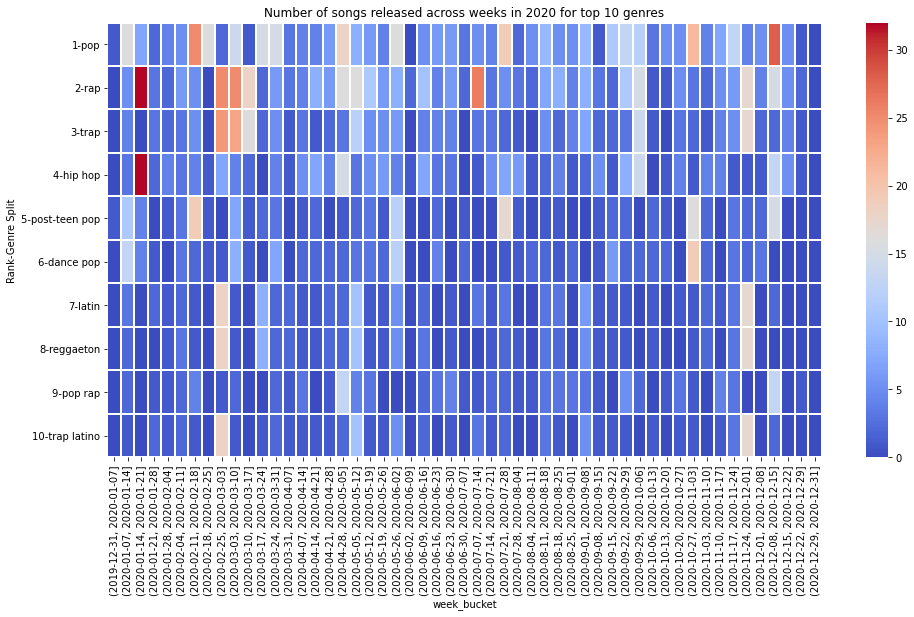

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(genre,cmap='coolwarm',linecolor='white',linewidth=1)
plt.title('Number of songs released across weeks in 2020 for top 10 genres')


* Most of the popular genres have about 0-15 songs released each week
* For rap and hip hop, many songs (>30) are released in third week in Jan 2020

## 4.0 Popularity vs Different Attributes

Investigate if there is any correlation between popularity vs the following attributes: <br>
- Danceability
- Energy
- Loudness
- Speechiness
- Acousticness
- Liveness
- Tempo
- Duration (ms)
- Valence

In [31]:
df4=df[df['Popularity']!=' '].reset_index(drop=True)
df4['Popularity']=df4['Popularity'].astype('int64')
df4['Duration (ms)']=df4['Duration (ms)'].astype('int64')

variables_float=['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence']
for i in variables_float:
     df4[i]=df4[i].astype('float64')
df4

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,MultipleArtist
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",...,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B,None
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db,None
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A,None
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",...,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B,None
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",...,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"dance pop, pop, uk pop",...,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A,None
1541,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"sertanejo, sertanejo universitario",...,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B,None
1542,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"dance pop, electropop, pop, post-teen pop",...,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D,None
1543,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"brega funk, funk carioca",...,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F,"<re.Match object; span=(0, 18), match='Dadá Bo..."


In [32]:
df4=df4.loc[:,['Popularity','Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Duration (ms)']]
df4

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration (ms)
0,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,0.589,211560
1,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,0.478,141806
2,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,0.688,178147
3,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,0.591,231041
4,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,0.894,212000
...,...,...,...,...,...,...,...,...,...,...
1540,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,0.608,209320
1541,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,0.714,181930
1542,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,0.394,217307
1543,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,0.881,152784


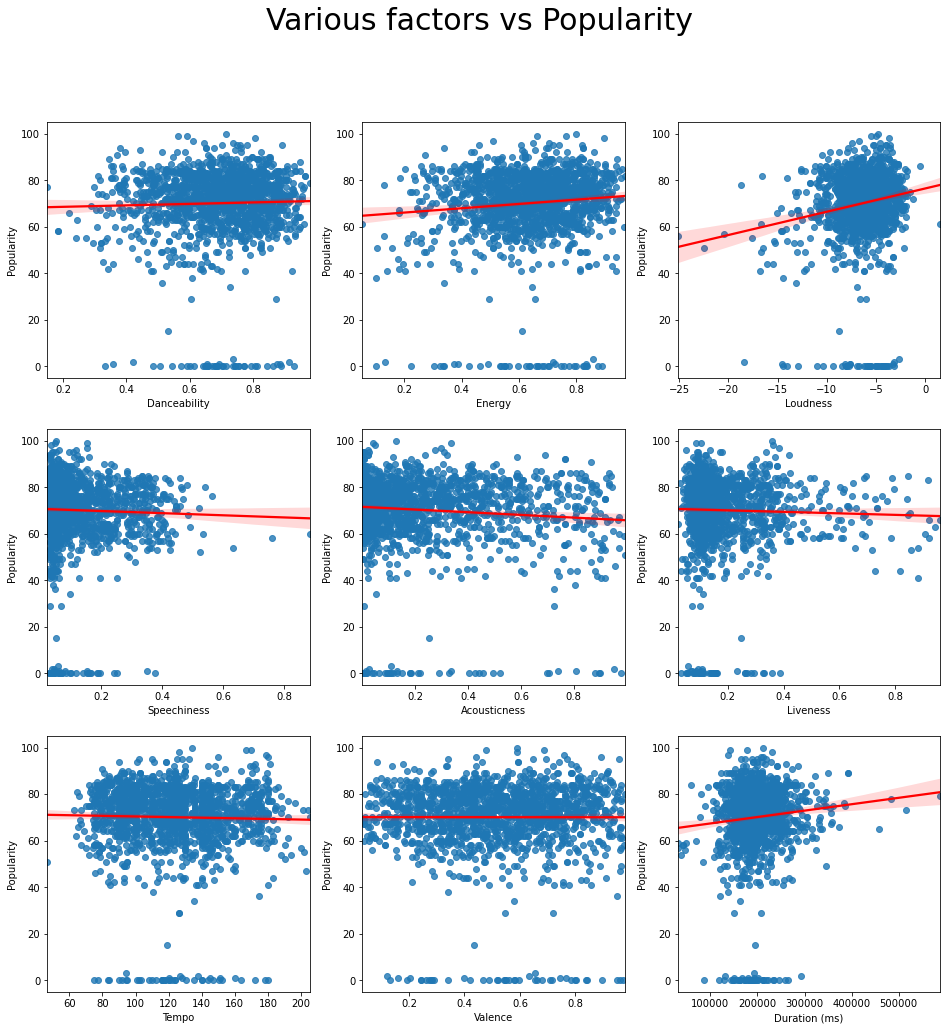

In [33]:
fig, axes = plt.subplots(figsize=(16,16),nrows =3, ncols =3)

sns.regplot(ax=axes[0,0],data=df4, x= 'Danceability', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[0,1],data=df4, x= 'Energy', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[0,2],data=df4, x= 'Loudness', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[1,0],data=df4, x= 'Speechiness', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[1,1],data=df4, x= 'Acousticness', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[1,2],data=df4, x= 'Liveness', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[2,0],data=df4, x= 'Tempo', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[2,1],data=df4, x= 'Valence', y = "Popularity",line_kws={"color":'red'})
sns.regplot(ax=axes[2,2],data=df4, x= 'Duration (ms)', y = "Popularity",line_kws={"color":'red'})


fig.suptitle('Various factors vs Popularity',size=30)

plt.show()


The regplot with the regression line will provide a clear viewer if there's any (positive or negative) correlation between the x variables and Popularity. Regplot are used for all nine charts. <br>

From the charts above:
* These variables seem to have positive correlation with popularity:Danceability, Energy, Loudness and Duration
* hese variables seem to have negative correlation with popularity:Acrousticness, Liveness
